In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def jamesSteinEstimator(x):
    return x*(1. - (x.size-2.)/sum(x*x))

In [3]:
def RMS(x,mu):
    return sqrt(sum((x-mu)*(x-mu)))

In [4]:
def doRun(n,nsamp=5000):
    nSamp=100
    mean=zeros(n)
    data = zeros(n*nSamp).reshape(n,nSamp)
    for i in range(n):
        mean[i] = 0.5 #set value of the mean's components here 
        data[i,:] = random.normal(mean[i],1,nSamp).T
    data=data.T

    avRMS_js = 0
    avRMS_mle = 0
    for x in data:
        avRMS_js += RMS(jamesSteinEstimator(x),mean)
        avRMS_mle += RMS(x,mean)
    avRMS_js /= nSamp
    avRMS_mle /= nSamp
    return (avRMS_js, avRMS_mle)

In [5]:
nToTest = linspace(2,20)
av_js = zeros(nToTest.size)
av_mle = zeros(nToTest.size)
for i,n in enumerate(nToTest):
    [av_js[i], av_mle[i]] = doRun(int(n))

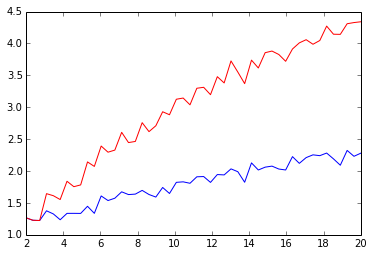

In [6]:
plt.plot(nToTest,av_js,c='b') #James Stein in blue
plt.plot(nToTest,av_mle,c='r') #MLE in red